### workflow examples for memo_py

Possible example workflows of the framework are outlined below. The workflows are categorised into the sections

- A Networks and Simulations
    - A1 define a network
    - A2 simulate a network by the Gillespie algorithm
    - A3 simulate a network by the moment-based algorithm
- B Data handling
    - B1 load mean, variance and covariance data
    - B2 create *in silico* count data and transform to mean, variance and covariance (including bootstrapping)
- C Parameter and Model Evidence Estimation
    - C1 fit a model to example data (the model to its own in silico data)
    - C2 fit a selection of models to the *in silico* data
    - C3 fit a selection of models to the example data

to explain the different functionalities of this framework.

In [3]:
import memo_py as me

### input
topology_1 = [
        {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'd_01', 'type': 'S -> E', 'reaction_steps': 1},
        {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 1}
        ]

### computation
net = me.Network('net_1')
net.structure(topology_1)

print(net.net_name)
print(net.net_modules)


/Users/m651s/opt/anaconda3/envs/cd44_project/lib/python3.7/site-packages/tqdm/autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


net_1
[{'module': 'module_0', 'start-end': ('X_t', 'Y_t'), 'start-end_ident': ('Z_0', 'Z_1'), 'sym_rate': 'd_01', 'sym_rate_ident': 'theta_0', 'type': 'S -> E', 'module_steps': 1}, {'module': 'module_1', 'start-end': ('Y_t', 'Y_t'), 'start-end_ident': ('Z_1', 'Z_1'), 'sym_rate': 'la_1', 'sym_rate_ident': 'theta_1', 'type': 'S -> S + S', 'module_steps': 1}]


In [4]:
import memo_py as me
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import corner
%matplotlib inline

#### A Networks and Simulations

#### A1 define a network

net_1
[{'module': 'module_0', 'start-end': ('X_t', 'Y_t'), 'start-end_ident': ('Z_0', 'Z_1'), 'sym_rate': 'd_01', 'sym_rate_ident': 'theta_0', 'type': 'S -> E', 'module_steps': 10}, {'module': 'module_1', 'start-end': ('Y_t', 'X_t'), 'start-end_ident': ('Z_1', 'Z_0'), 'sym_rate': 'd_10', 'sym_rate_ident': 'theta_1', 'type': 'S -> E', 'module_steps': 10}, {'module': 'module_2', 'start-end': ('Y_t', 'Y_t'), 'start-end_ident': ('Z_1', 'Z_1'), 'sym_rate': 'la_1', 'sym_rate_ident': 'theta_2', 'type': 'S -> S + S', 'module_steps': 10}]


/Users/m651s/opt/anaconda3/envs/cd44_project/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/m651s/opt/anaconda3/envs/cd44_project/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/Users/m651s/opt/anaconda3/envs/cd44_project/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


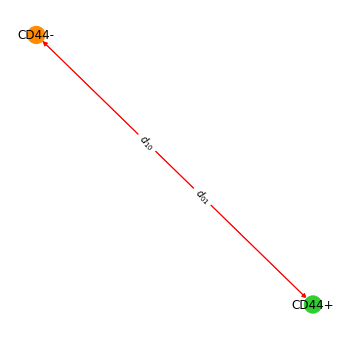

In [3]:
### input
topology_1 = [
        {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'd_01', 'type': 'S -> E', 'reaction_steps': 10},
        {'start': 'Y_t', 'end': 'X_t', 'rate_symbol': 'd_10', 'type': 'S -> E', 'reaction_steps': 10},
        {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 10}
        ]

### computation
net = me.Network('net_1')
net.structure(topology_1)

print(net.net_name)
print(net.net_modules)

### plot the network (main and hidden layer)
# main
x_axis = None
y_axis = None

node_settings = {
    'Y_t': {'label': 'CD44+', 'color': 'limegreen'},
    'X_t': {'label': 'CD44-', 'color': 'darkorange'}
}

# empty string ('') to not show label
# None or 'some color' to set color (default='grey35')
edge_settings = {
    'd_01': {'label': '$d_{01}}$', 'color': 'red'},
    'd_10': {'label': '$d_{10}$', 'color': 'red'},
    'la_1': {'label': 'la', 'color': 'red'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'network_main_plot'}

im = me.Plots(x_axis, y_axis, show=True)
im.network_graph(*net.draw_main_network_graph(node_settings, edge_settings), output)

######
# NOTE: for all network plots, latex style labels cannot be used; 
# html style labels might be used instead (e.g., '<Y<SUP>t</SUP>>'; does not work for pdf)
######

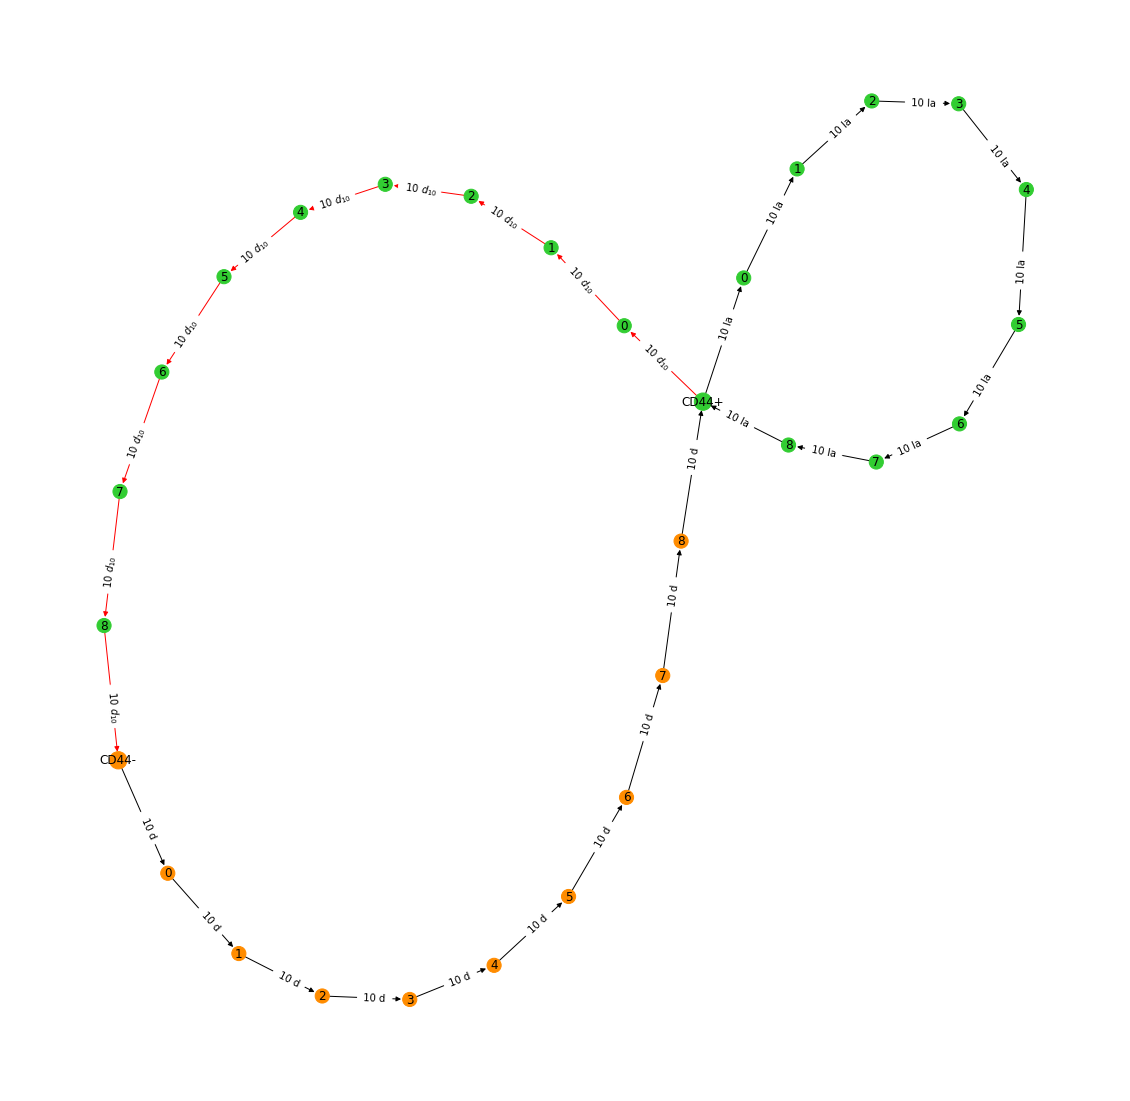

In [4]:
# hidden
x_axis = None
y_axis = None

node_settings = {
    'Y_t': {'label': 'CD44+', 'color': 'limegreen'},
    'X_t': {'label': 'CD44-', 'color': 'darkorange'}
}

# empty string ('') to not show label
# None or 'some color' to set color (default='grey35')
edge_settings = {
    'd_01': {'label': 'd', 'color': None},
    'd_10': {'label': '$d_{10}$', 'color': 'red'},
    'la_1': {'label': 'la', 'color': None}
}

output = {'output_folder': './example_figures',
        'plot_name': 'network_hidden_plot'}

im = me.Plots(x_axis, y_axis, show=True)
im.network_graph(*net.draw_hidden_network_graph(node_settings, edge_settings), output, figsize=(20, 20))

#### A2 simulate a network by the Gillespie algorithm

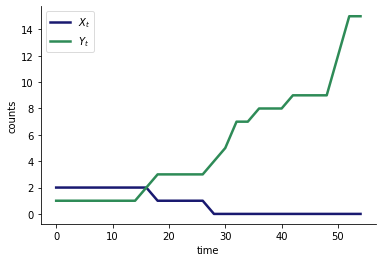

In [5]:
### input
topology_1 = [
        {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'd_01', 'type': 'S -> E', 'reaction_steps': 5},
        {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 5}
        ]


initial_values = {'X_t': 2, 'Y_t': 1}
theta_values = {'la_1': 0.06, 'd_01': 0.04}
time_values = np.linspace(0.0, 54.0, num=28, endpoint=True)
variables = {'X_t': ('X_t', ), 'Y_t': ('Y_t', )}

### computation
net = me.Network('net_1')
net.structure(topology_1)

sim = me.Simulation(net)
res = sim.simulate('gillespie', initial_values, theta_values, time_values, variables)

### plotting
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'counts',
        'limits': (None, None),
        'log': False}

settings = {
    'Y_t': {'label': '$Y_t$', 'color': 'seagreen'},
    'X_t': {'label': '$X_t$', 'color': 'midnightblue'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'line_evolv_counts'}

im = me.Plots(x_axis, y_axis, show=True)
im.line_evolv(*sim.line_evolv_counts(settings), output)

#### A3 simulate a network by the moment-based algorithm

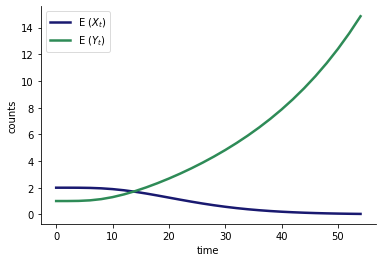

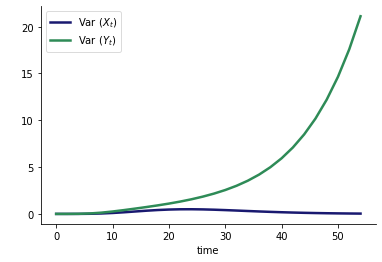

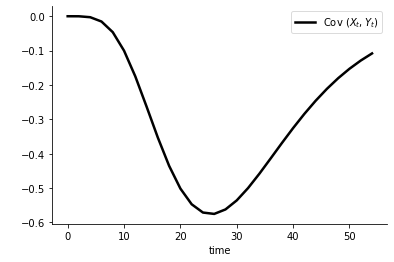

In [6]:
### input
topology_1 = [
        {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'd_01', 'type': 'S -> E', 'reaction_steps': 5},
        {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 5}
        ]

initial_values = {'X_t': 2.0, 'Y_t': 1.0}
theta_values = {'la_1': 0.06, 'd_01': 0.04}
time_values = np.linspace(0.0, 54.0, num=28, endpoint=True)
variables = {'X_t': ('X_t', ), 'Y_t': ('Y_t', )}

### computation
net = me.Network('net_1')
net.structure(topology_1)

sim = me.Simulation(net)
res = sim.simulate('moments', initial_values, theta_values, time_values, variables)

### plotting
# mean
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'counts',
        'limits': (None, None),
        'log': False}

settings = {
    'Y_t': {'label': 'E $(Y_t)$', 'color': 'seagreen'},
    'X_t': {'label': 'E $(X_t)$', 'color': 'midnightblue'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'line_evolv_mean'}

im = me.Plots(x_axis, y_axis, show=True)
im.line_evolv(*sim.line_evolv_mean(settings), output)

# var
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}

settings = {
    ('Y_t', 'Y_t'): {'label': 'Var $(Y_t)$', 'color': 'seagreen'},
    ('X_t', 'X_t'): {'label': 'Var $(X_t)$', 'color': 'midnightblue'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'line_evolv_var'}

im = me.Plots(x_axis, y_axis, show=True)
im.line_evolv(*sim.line_evolv_variance(settings), output)

# cov
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}

settings = {
    ('Y_t', 'X_t'): {'label': 'Cov $(X_t, Y_t)$', 'color': 'black'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'line_evolv_cov'}

im = me.Plots(x_axis, y_axis, show=True)
im.line_evolv(*sim.line_evolv_covariance(settings), output)


#### A4 derive the symbolic moment equations for a defined network

#### B Data handling

#### B1 load mean, variance and covariance data

['Y_t', 'X_t']


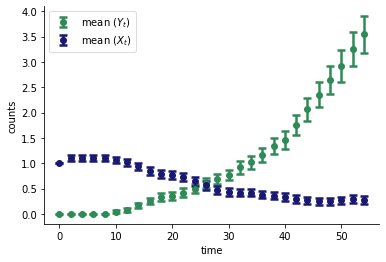

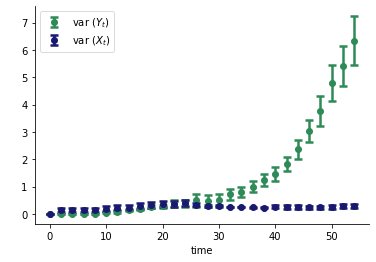

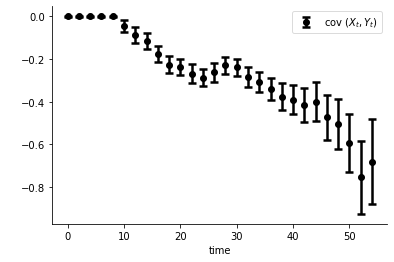

In [8]:
### load predefined data set with pickle
data = pickle.load(open('count_data_cd44_manual_counting_18_01_14.pickle', 'rb'))
print(data)
print(data.data_variables)

### plotting
# mean
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'counts',
        'limits': (None, None),
        'log': False}

settings = {
    'Y_t': {'label': 'mean $(Y_t)$', 'color': 'seagreen'},
    'X_t': {'label': 'mean $(X_t)$', 'color': 'midnightblue'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'dots_w_bars_evolv_mean'}
        
im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars_evolv(*data.dots_w_bars_evolv_mean(settings), output)

# var
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}

settings = {
    ('Y_t', 'Y_t'): {'label': 'var $(Y_t)$', 'color': 'seagreen'},
    ('X_t', 'X_t'): {'label': 'var $(X_t)$', 'color': 'midnightblue'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'dots_w_bars_evolv_var'}
        
im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars_evolv(*data.dots_w_bars_evolv_variance(settings), output)

# cov
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}

settings = {
    ('X_t', 'Y_t'): {'label': 'cov $(X_t, Y_t)$', 'color': 'black'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'dots_w_bars_evolv_cov'}
        
im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars_evolv(*data.dots_w_bars_evolv_covariance(settings), output)


#### B2 load count data and transform to mean, variance and covariance (including bootstrapping)

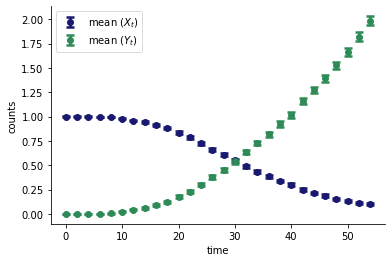

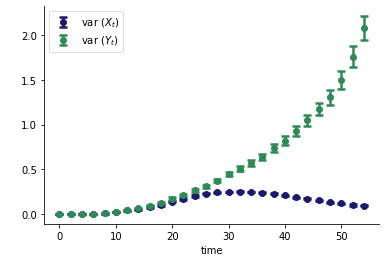

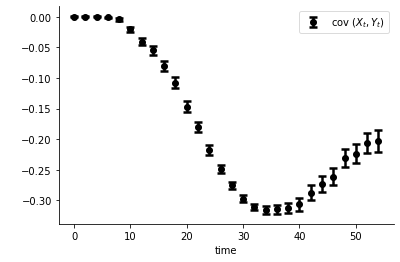

In [9]:
### run simulations to obtain in silico counts
num_iter = 1000 # 40

topology_1 = [
        {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'd_01', 'type': 'S -> E', 'reaction_steps': 5},
        {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 5}
        ]

initial_values = {'X_t': 1, 'Y_t': 0}
theta_values = {'la_1': 0.055, 'd_01': 0.030}
time_values = np.linspace(0.0, 54.0, num=28, endpoint=True)
variables = {'X_t': ('X_t', ), 'Y_t': ('Y_t', )}

net = me.Network('net_1')
net.structure(topology_1)

sim = me.Simulation(net)
res_list = list()

for __ in range(num_iter):
    res_list.append(sim.simulate('gillespie', initial_values, theta_values, time_values, variables)[1])

in_silico_counts = np.array(res_list)

### creation of a new data object
data_name = 'data_in_silico'

data_input = {
    # general settings
    'variables': ['X_t', 'Y_t'], # indices here are matched to indices of data
    'data_type': 'counts', # 'summary' or 'counts'
    
    # time points
    'time_values': time_values, # shape (# time_values, )
    
    # if data_type 'summary'
    'mean_data': np.array([]), # shape (2, # variables, # time_values)
    'var_data': np.array([]), # variance, shape (2, # variables, # time_values)
    'cov_data': np.array([]), # covariance, shape (2, # variables, # time_values)
    
    # if data_type 'counts'
    'count_data': in_silico_counts, # shape (# number of simulations, # variables, # time_values)
    'bootstrap_samples': 10000, # 100000
    
    # handling of standard errors that are zero
    # all standard errors <= basic_sigma, will be set to basic_sigma
    'basic_sigma': 0.001
}


data = me.Data(data_name)
data.load(data_input)

### plotting
# mean
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'counts',
        'limits': (None, None),
        'log': False}

settings = {
    'Y_t': {'label': 'mean $(Y_t)$', 'color': 'seagreen'},
    'X_t': {'label': 'mean $(X_t)$', 'color': 'midnightblue'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'in_silico_dots_w_bars_evolv_mean'}
        
im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars_evolv(*data.dots_w_bars_evolv_mean(settings), output)

# var
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}

settings = {
    ('Y_t', 'Y_t'): {'label': 'var $(Y_t)$', 'color': 'seagreen'},
    ('X_t', 'X_t'): {'label': 'var $(X_t)$', 'color': 'midnightblue'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'in_silico_dots_w_bars_evolv_var'}
        
im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars_evolv(*data.dots_w_bars_evolv_variance(settings), output)

# cov
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}

settings = {
    ('X_t', 'Y_t'): {'label': 'cov $(X_t, Y_t)$', 'color': 'black'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'in_silico_dots_w_bars_evolv_cov'}
        
im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars_evolv(*data.dots_w_bars_evolv_covariance(settings), output)

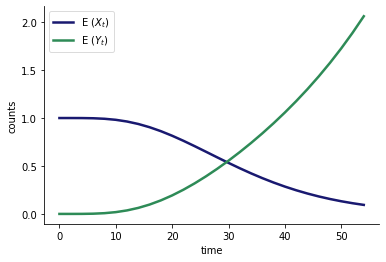

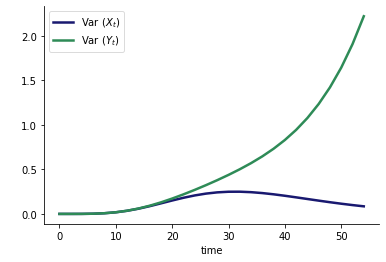

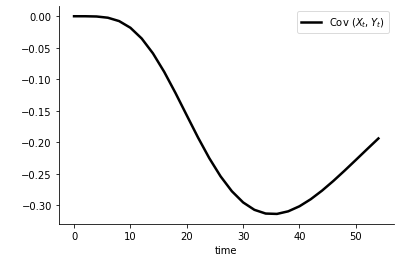

In [10]:
### compare to exact moments

topology_1 = [
        {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'd_01', 'type': 'S -> E', 'reaction_steps': 5},
        {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 5}
        ]

initial_values = {'X_t': 1.0, 'Y_t': 0.0}
theta_values = {'la_1': 0.055, 'd_01': 0.030}
time_values = np.linspace(0.0, 54.0, num=28, endpoint=True)
variables = {'X_t': ('X_t', ), 'Y_t': ('Y_t', )}

net = me.Network('net_1')
net.structure(topology_1)

sim = me.Simulation(net)
res = sim.simulate('moments', initial_values, theta_values, time_values, variables)

# plotting
# mean
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'counts',
        'limits': (None, None),
        'log': False}

settings = {
    'Y_t': {'label': 'E $(Y_t)$', 'color': 'seagreen'},
    'X_t': {'label': 'E $(X_t)$', 'color': 'midnightblue'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'in_silico_line_evolv_mean'}

im = me.Plots(x_axis, y_axis, show=True)
im.line_evolv(*sim.line_evolv_mean(settings), output)

# var
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}

settings = {
    ('Y_t', 'Y_t'): {'label': 'Var $(Y_t)$', 'color': 'seagreen'},
    ('X_t', 'X_t'): {'label': 'Var $(X_t)$', 'color': 'midnightblue'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'in_silico_line_evolv_var'}

im = me.Plots(x_axis, y_axis, show=True)
im.line_evolv(*sim.line_evolv_variance(settings), output)

# cov
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}

settings = {
    ('Y_t', 'X_t'): {'label': 'Cov $(X_t, Y_t)$', 'color': 'black'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'in_silico_line_evolv_cov'}

im = me.Plots(x_axis, y_axis, show=True)
im.line_evolv(*sim.line_evolv_covariance(settings), output)

In [11]:
### store python object of the in silico data with pickle
with open('in_silico_data.pickle', 'wb') as file_:
    pickle.dump(data, file_)

#### B3 simulate moments of a network and load as *in silico* data

#### C Parameter and Model Evidence Estimation

#### C1 fit a model to example data (the model to its own *in silico* data)

In [12]:
### list of models (just one here)
topology_1 = [
        {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'd_01', 'type': 'S -> E', 'reaction_steps': 5},
        {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 5}
        ]

setup_1 = {'initial_values': {'X_t': 1.0, 'Y_t': 0.0}, 'theta_bounds': {'d_01': (0.0, 0.15), 'la_1': (0.0, 0.15)}, 'variables': {'X_t': ('X_t', ), 'Y_t': ('Y_t', )}}
    
topology_2 = [
       {'start': 'Y_t', 'end': 'X_t', 'rate_symbol': 'd_01', 'type': 'S -> E', 'reaction_steps': 3},
       {'start': 'X_t', 'end': 'X_t', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 3}
       ]
setup_2 = {'initial_values': {'X_t': 0.0, 'Y_t': 1.0}, 'theta_bounds': {'d_01': (0.0, 0.15), 'la_1': (0.0, 0.15)}, 'variables': {'X_t': ('X_t', ), 'Y_t': ('Y_t', )}}

topology_3 = [
       {'start': 'Y_t', 'end': 'X_t', 'rate_symbol': 'd_01', 'type': 'S -> E', 'reaction_steps': 1},
       {'start': 'X_t', 'end': 'X_t', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 1}
       ]
setup_3 = {'initial_values': {'X_t': 0.0, 'Y_t': 1.0}, 'theta_bounds': {'d_01': (0.0, 0.15), 'la_1': (0.0, 0.15)}, 'variables': {'X_t': ('X_t', ), 'Y_t': ('Y_t', )}}


list_models = [
    [('net_1'), (topology_1), (setup_1)],
    [('net_2'), (topology_2), (setup_2)],
    [('net_3'), (topology_3), (setup_3)]
]

### load the in silico data from section B
data = pickle.load(open('in_silico_data.pickle', 'rb'))
print(data)
print(data.data_name)

### input for selection
d = {
# model set
'model_set': list_models,

# data/model settings
'data': data,
'mean_only': False, # True or False

# nested sampling settings
'nlive':                    1000, # 250 # 1000
'tolerance':                0.01, # 0.1 # 0.05 # 0.01
'bound':                    'multi',
'sample':                   'unif'
}

### computation, result is a list of Estimation class instances
res = me.select_models(d)


data_in_silico


In [4]:
### computation, result is a list of Estimation class instances
res = me.select_models(d, parallel={'do':False})

In [13]:
### save in silico estimation with pickle
with open('in_silico_estimation.pickle', 'wb') as file_:
    pickle.dump(res, file_)

In [5]:
### load in silico estimation with pickle
res = pickle.load(open('in_silico_estimation.pickle', 'rb'))
print(res)

[<memo_py.estimation.Estimation object at 0x7fdd11944c50>, <memo_py.estimation.Estimation object at 0x7fdd01abe0d0>, <memo_py.estimation.Estimation object at 0x7fdd225a6910>]


In [6]:
### read out some evidence values for all models
print('evidence (nested sampling)')
for est_i in res:
    print(est_i.est_name, ': ', est_i.bay_est_log_evidence, ' +/-', est_i.bay_est_log_evidence_error)
    
print('\n', 'loglikelihood (max)')
for est_i in res:
    print(est_i.est_name, ': ', est_i.bay_est_log_likelihood_max)
    
print('\n', 'BIC')
for est_i in res:
    print(est_i.est_name, ': ', est_i.bay_est_bayesian_information_criterion)
    
print('\n', 'evidence (based on BIC)')
for est_i in res:
    print(est_i.est_name, ': ', est_i.bay_est_log_evidence_from_bic)

evidence (nested sampling)
est_net_1 :  499.94033468334004  +/- 0.14816991087762207
est_net_2 :  -2941041.3433151366  +/- 0.19963504969177973
est_net_3 :  -2363233.315327876  +/- 0.20460981999788344

 loglikelihood (max)
est_net_1 :  511.9086694793777
est_net_2 :  -2941019.721377322
est_net_3 :  -2363211.2449379456

 BIC
est_net_1 :  -1013.9340541135368
est_net_2 :  5882049.326039489
est_net_3 :  4726432.373160737

 evidence (based on BIC)
est_net_1 :  506.9670270567684
est_net_2 :  -2941024.6630197447
est_net_3 :  -2363216.1865803683


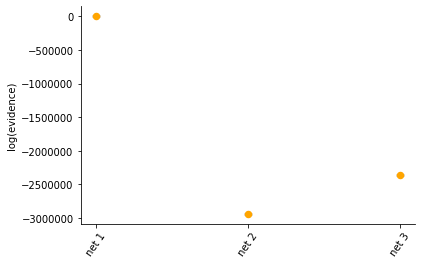

In [7]:
### log evidences of all models
model_selection = res

x_axis = {'label': '',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'log(evidence)',
        'limits': (None, None),
        'log': False}

settings = {
    'est_net_1': {'label': 'net 1', 'color': 'orange'},
    'est_net_2': {'label': 'net 2', 'color': 'orange'},
    'est_net_3': {'label': 'net 3', 'color': 'orange'}
            }

output = {'output_folder': './example_figures',
        'plot_name': 'fig_test_dots_bars_evidence'}

im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars(*me.selection.dots_w_bars_evidence(model_selection, settings), output)

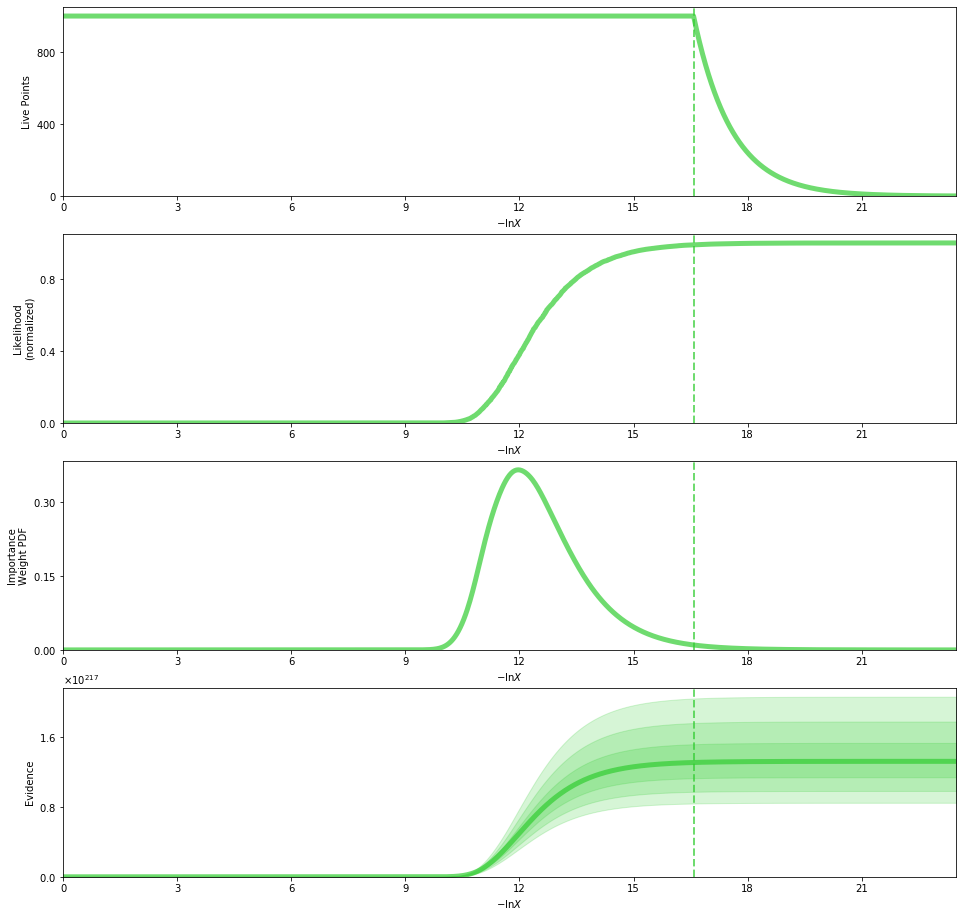

In [8]:
### runplot for an estimation result
est = res[0]

x_axis = {'label': ' ',
    'limits': (None, None),
    'log': False}
y_axis = {'label': ' ',
    'limits': (None, None),
    'log': False}

output = {'output_folder': './example_figures',
    'plot_name': est.net.net_name + '_runplot'}

im = me.Plots(x_axis, y_axis, show=True)
im.sampling_runplot(est.bay_nested_sampler_res, output)

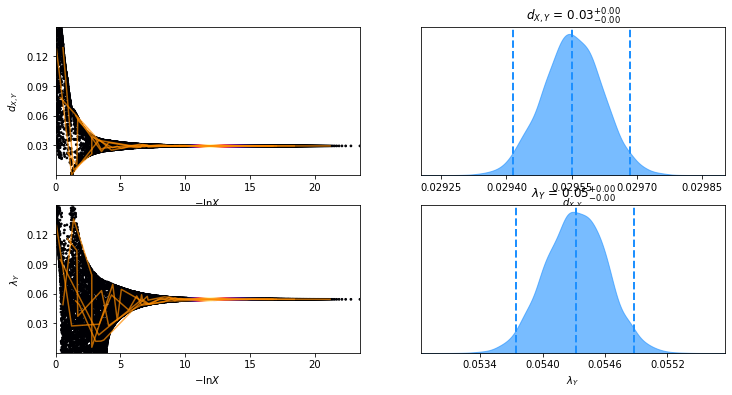

In [9]:
### traceplot for an estimation result
est = res[0]

# plot dynesty runplot
x_axis = {'label': ' ',
    'limits': (None, None),
    'log': False}
y_axis = {'label': ' ',
    'limits': (None, None),
    'log': False}

settings = {
    'la_1': {'label': '$\lambda_Y$', 'color': 'dodgerblue'},
    'd_01': {'label': '$d_{X,Y}$', 'color': 'red'}
    }

output = {'output_folder': './example_figures',
    'plot_name': est.net.net_name + '_traceplot'}

im = me.Plots(x_axis, y_axis, show=True)
im.sampling_traceplot(*est.sampling_res_and_labels(settings), output)

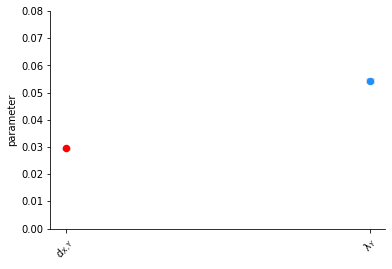

[0.02955123 0.05432386]
((0.029551231003482573, 0.029417226515324045, 0.029684831345676968), (0.054323857698597204, 0.05374647351063927, 0.05488053872320005))
[[0.14989421 0.14942584]
 [0.13613321 0.14997161]
 [0.12569168 0.14943513]
 ...
 [0.02955041 0.05432052]
 [0.02955093 0.0543241 ]
 [0.02955096 0.05432264]]
[[0.02985636 0.05462405]
 [0.02938493 0.05553574]
 [0.02967961 0.05307376]
 ...
 [0.02955184 0.05432062]
 [0.02955139 0.05431939]
 [0.02954976 0.05432454]]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.93779809e-06
 9.93790610e-06 9.93806822e-06]


In [10]:
### plot one-dimensional parameter confidence bounds
x_axis = {'label': '',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'parameter',
        'limits': (0, 0.08),
        'log': False}

settings = {
    'la_1': {'label': '$\lambda_Y$', 'color': 'dodgerblue'},
    'd_01': {'label': '$d_{X,Y}$', 'color': 'red'}
    }

output = {'output_folder': './example_figures',
        'plot_name': 'fig_test_dots_bars_params_conf'}

im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars(*est.dots_w_bars_parameters(settings), output)

### median and 95% confidence intervals of parameter estimates
print(est.bay_est_params_median)
print(est.bay_est_params_conf)

### actual parameter sampples
print(est.bay_est_samples)
print(est.bay_est_samples_weighted)
print(est.bay_est_weights)

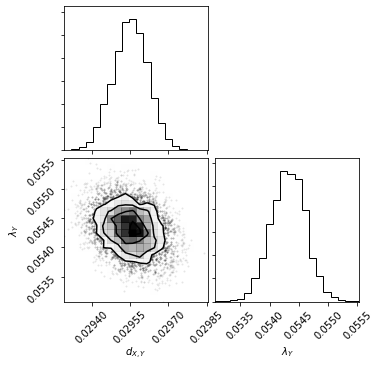

In [11]:
### corner plot

x_axis = {'label': '',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'parameter',
        'limits': (0, 0.08),
        'log': False}

settings = {
    'la_1': {'label': '$\lambda_Y$', 'color': 'dodgerblue'},
    'd_01': {'label': '$d_{X,Y}$', 'color': 'red'}
    }

output = {'output_folder': './example_figures',
        'plot_name': 'fig_test_corner'}

im = me.Plots(x_axis, y_axis, show=True)
im.samples_corner(*est.samples_corner_parameters(settings), output)

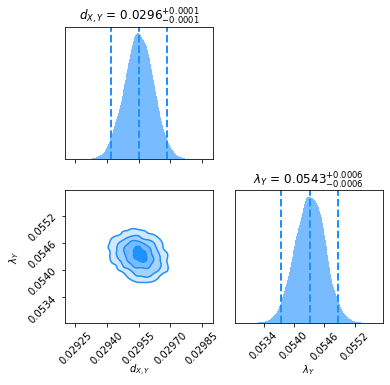

In [12]:
### corner kernel plot
x_axis = {'label': ' ',
    'limits': (None, None),
    'log': False}
y_axis = {'label': ' ',
    'limits': (None, None),
    'log': False}

settings = {
    'la_1': {'label': '$\lambda_Y$', 'color': 'dodgerblue'},
    'd_01': {'label': '$d_{X,Y}$', 'color': 'red'}
    }

output = {'output_folder': './example_figures',
    'plot_name': est.net.net_name + '_cornerkernel'}

im = me.Plots(x_axis, y_axis, show=True)
im.samples_cornerkernel(*est.sampling_res_and_labels(settings), output)

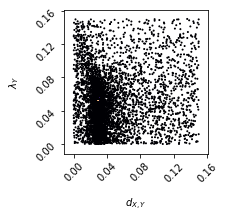

In [13]:
### cornerpoints plot

x_axis = {'label': ' ',
    'limits': (None, None),
    'log': False}
y_axis = {'label': ' ',
    'limits': (None, None),
    'log': False}

settings = {
    'la_1': {'label': '$\lambda_Y$', 'color': 'dodgerblue'},
    'd_01': {'label': '$d_{X,Y}$', 'color': 'red'}
    }

output = {'output_folder': './example_figures',
    'plot_name': est.net.net_name + '_cornerpoints'}

im = me.Plots(x_axis, y_axis, show=True)
im.samples_cornerpoints(*est.sampling_res_and_labels(settings), output)

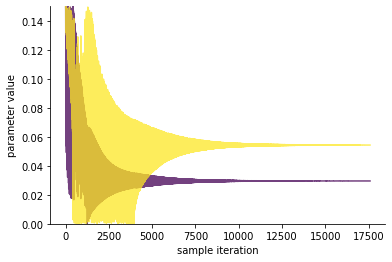

In [14]:
### parameter chains from nested sampling
x_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (0.0, 0.15),
        'log': False}

output = {'output_folder': './example_figures',
        'plot_name': 'fig_test_chains'}

im = me.Plots(x_axis, y_axis, show=True)
im.samples_chains(*est.samples_chains_parameters(), output)

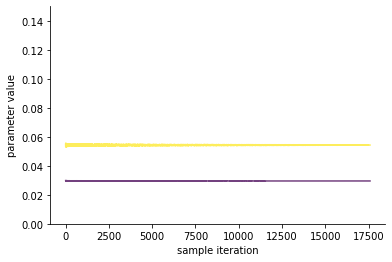

In [15]:
### weighted parameter chains from nested sampling
x_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (0.0, 0.15),
        'log': False}

output = {'output_folder': './example_figures',
        'plot_name': 'fig_test_chains'}

im = me.Plots(x_axis, y_axis, show=True)
im.samples_chains(*est.samples_weighted_chains_parameters(), output)

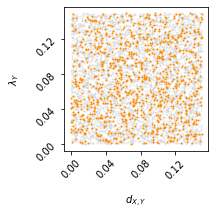

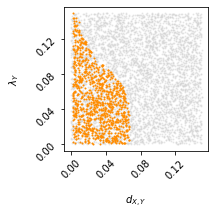

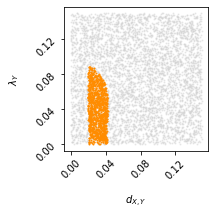

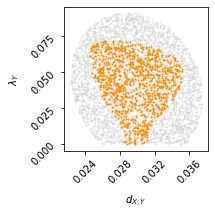

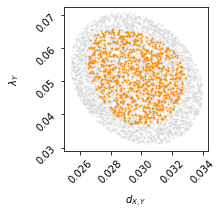

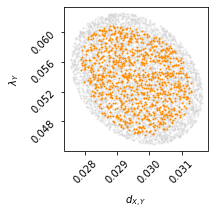

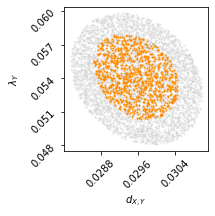

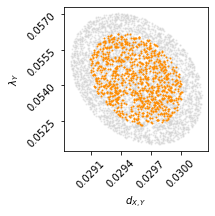

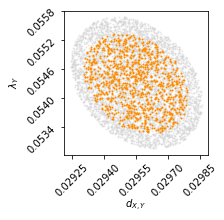

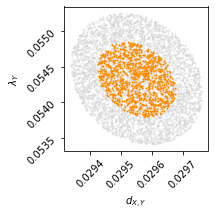

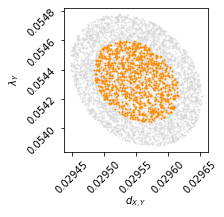

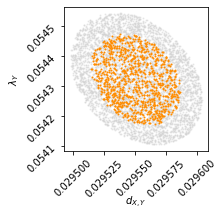

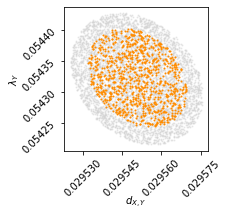

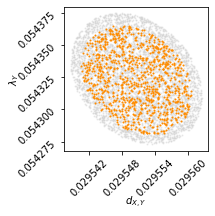

In [16]:
### cornerbounds plots
x_axis = {'label': ' ',
    'limits': (None, None),
    'log': False}
y_axis = {'label': ' ',
    'limits': (None, None),
    'log': False}

settings = {
    'la_1': {'label': '$\lambda_Y$', 'color': 'dodgerblue'},
    'd_01': {'label': '$d_{X,Y}$', 'color': 'red'}
    }

output = {'output_folder': './example_figures',
    'plot_name': est.net.net_name + '_cornerbound'}

im = me.Plots(x_axis, y_axis, show=True)
im.samples_cornerbounds(*est.sampling_res_and_labels_and_priortransform(settings), output)

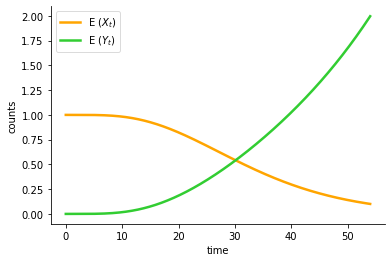

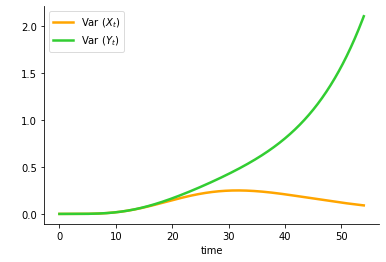

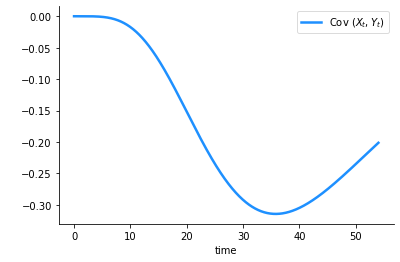

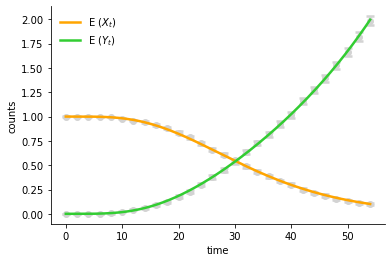

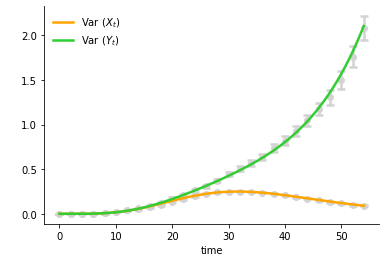

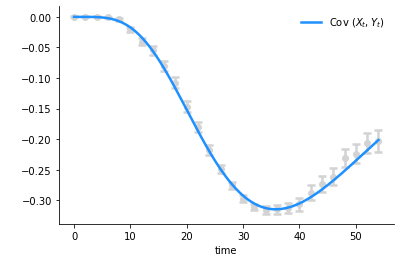

In [15]:
### model fits and model predictions, data optional in the background
### plotting best-fits model (without data and band)
# mean
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'counts',
        'limits': (None, None),
        'log': False}

settings = {
    'Y_t': {'label': 'E $(Y_t)$', 'color': 'limegreen'},
    'X_t': {'label': 'E $(X_t)$', 'color': 'orange'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'line_evolv_bestfit_mean'}

im = me.Plots(x_axis, y_axis, show=True)
im.line_evolv(*est.line_evolv_bestfit_mean(settings), output)

# var
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}

settings = {
    ('Y_t', 'Y_t'): {'label': 'Var $(Y_t)$', 'color': 'limegreen'},
    ('X_t', 'X_t'): {'label': 'Var $(X_t)$', 'color': 'orange'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'line_evolv_bestfit_var'}

im = me.Plots(x_axis, y_axis, show=True)
im.line_evolv(*est.line_evolv_bestfit_variance(settings), output)

# cov
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}

settings = {
    ('Y_t', 'X_t'): {'label': 'Cov $(X_t, Y_t)$', 'color': 'dodgerblue'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'line_evolv_bestfit_cov'}

im = me.Plots(x_axis, y_axis, show=True)
im.line_evolv(*est.line_evolv_bestfit_covariance(settings), output)

### plotting best-fits model with data (without band)
# mean
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'counts',
        'limits': (None, None),
        'log': False}

settings = {
    'Y_t': {'label': 'E $(Y_t)$', 'color': 'limegreen'},
    'X_t': {'label': 'E $(X_t)$', 'color': 'orange'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'line_evolv_bestfit_mean_data'}

im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars_and_line_evolv(*est.dots_w_bars_and_line_evolv_bestfit_mean_data(settings), output)

# var
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}

settings = {
    ('Y_t', 'Y_t'): {'label': 'Var $(Y_t)$', 'color': 'limegreen'},
    ('X_t', 'X_t'): {'label': 'Var $(X_t)$', 'color': 'orange'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'line_evolv_bestfit_var_data'}

im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars_and_line_evolv(*est.dots_w_bars_and_line_evolv_bestfit_variance_data(settings), output)

# cov
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}

settings = {
    ('Y_t', 'X_t'): {'label': 'Cov $(X_t, Y_t)$', 'color': 'dodgerblue'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'line_evolv_bestfit_cov_data'}

im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars_and_line_evolv(*est.dots_w_bars_and_line_evolv_bestfit_covariance_data(settings), output)

In [16]:
### best-fits model with confidence band plots
# TODO (also update function in framework)

#### C2 fit a selection of models to the *in silico* data

#### C3 fit a selection of models to the example data